         date  steps  weight
0  2025-08-01  12500   78.50
1  2025-08-02  15000   78.25
2  2025-08-03  17769   78.00
0    12500
1    15000
2    17769
Name: steps, dtype: int64
         date  steps  weight
1  2025-08-02  15000   78.25
2  2025-08-03  17769   78.00


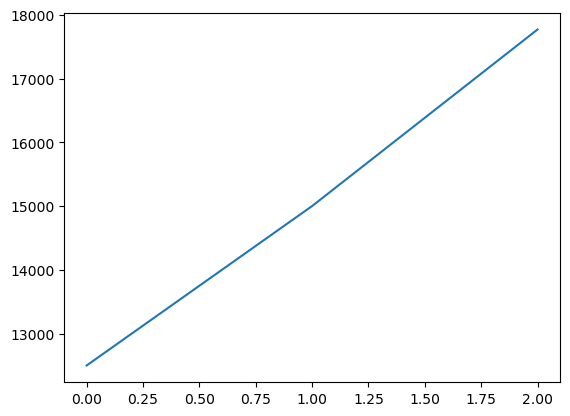

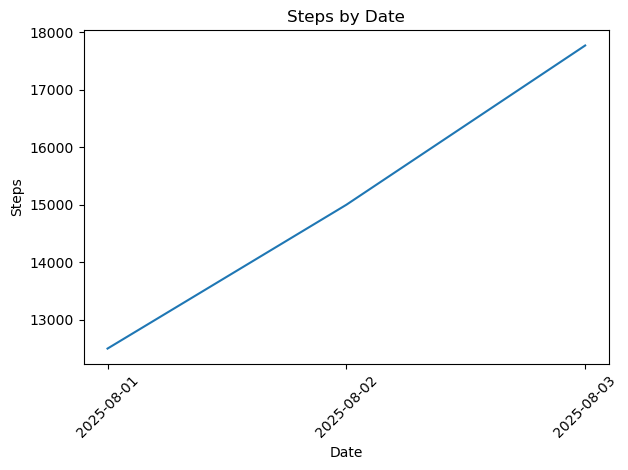

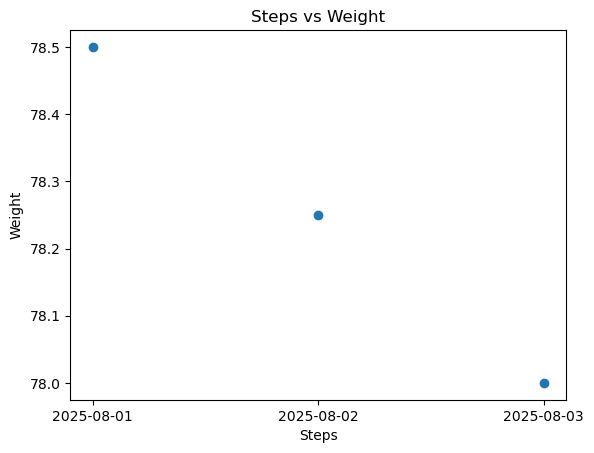

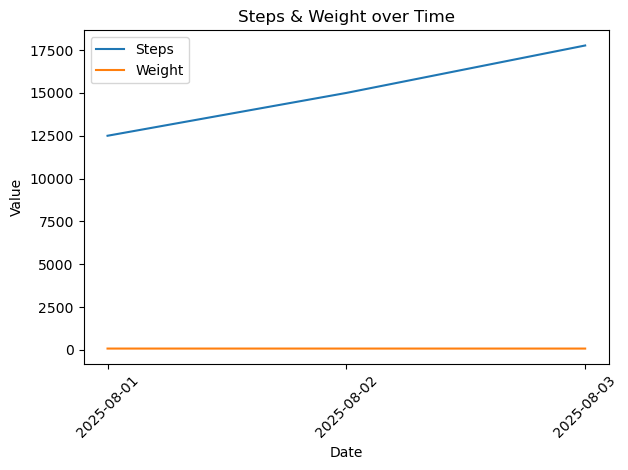

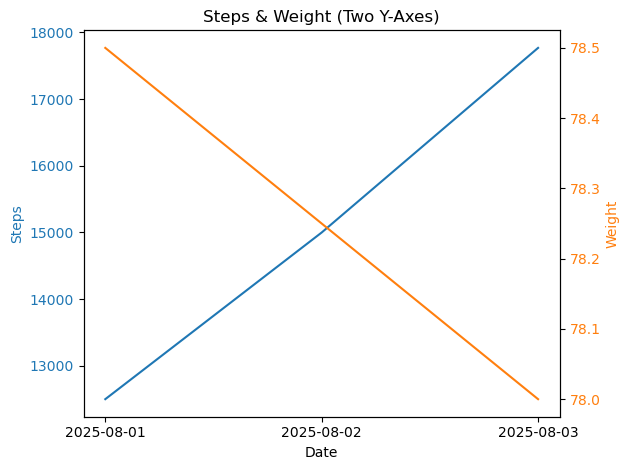

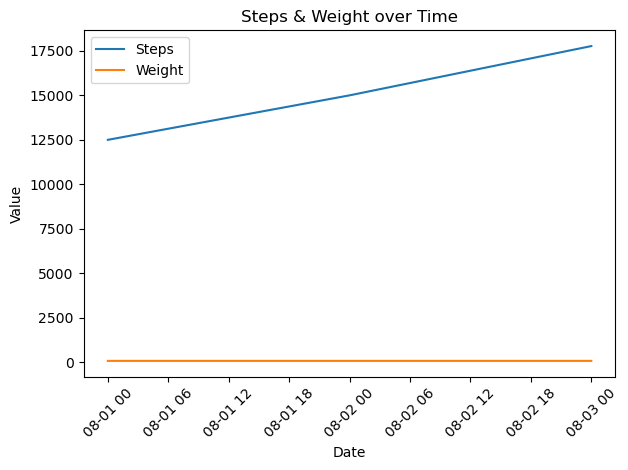

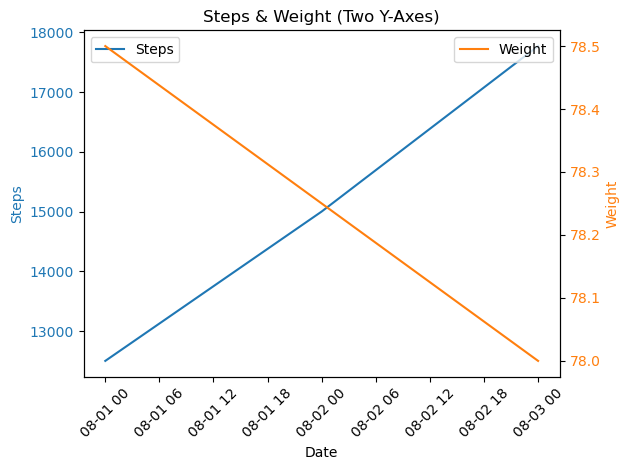

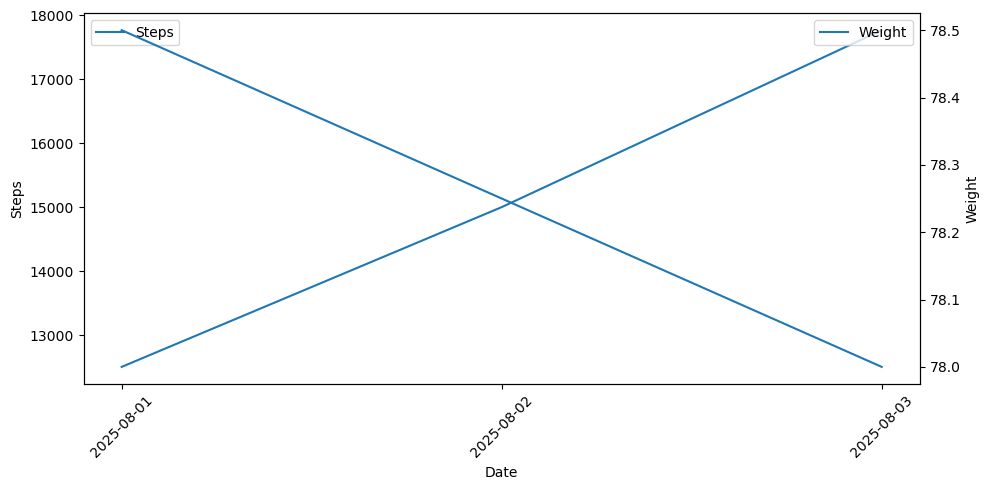

,date,steps,weight,calorie
count,3,3.000000,3.000,3.000000
mean,2025-08-02 00:00:00,15089.666667,78.250,603.586667
min,2025-08-01 00:00:00,12500.000000,78.000,500.000000
25%,2025-08-01 12:00:00,13750.000000,78.125,550.000000
50%,2025-08-02 00:00:00,15000.000000,78.250,600.000000
75%,2025-08-02 12:00:00,16384.500000,78.375,655.380000
max,2025-08-03 00:00:00,17769.000000,78.500,710.760000
std,NaN,2635.644197,0.250,105.425768


,steps,weight
steps,1.000000,-0.999566
weight,-0.999566,1.000000


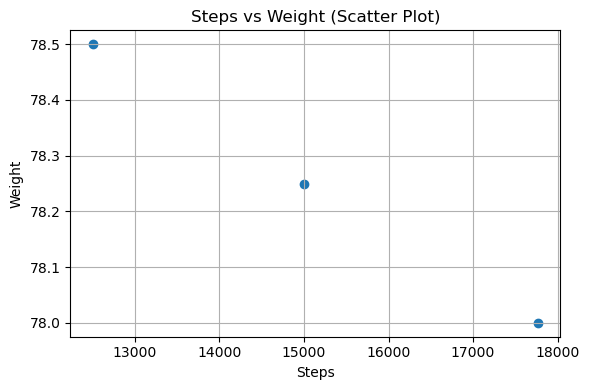

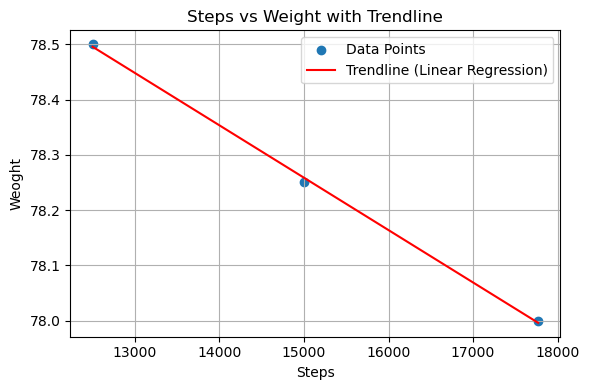

回帰直線:  weight = -0.000095 * steps + 79.681
18000 歩 → 予測体重 77.97 kg
20000 歩 → 予測体重 77.78 kg
15000 歩 → 予測体重 78.26 kg


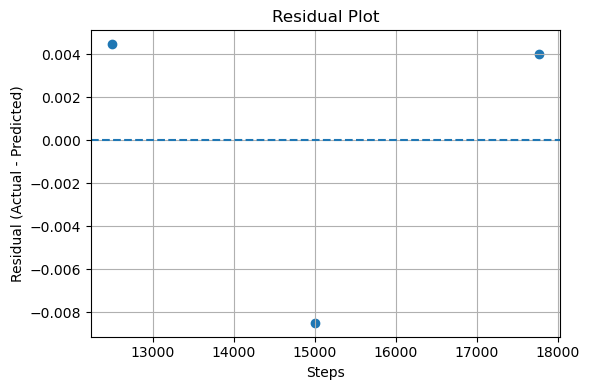

In [3]:
# 辞書のリストを pandas の DataFrame に変換する
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 元データ（辞書のリスト）
records = [
    {"date": "2025-08-01", "steps": 12500, "weight": 78.5},
    {"date": "2025-08-02", "steps": 15000, "weight": 78.25},
    {"date": "2025-08-03", "steps": 17769, "weight": 78.0}
]

# DataFrame に変換
df = pd.DataFrame(records)

df

# DataFrame の基本操作
print(df)

# 特定の列だけ（歩数）
print(df["steps"])

# 条件抽出（15,000歩以上）
print(df[df["steps"] >= 15000])

# 新しい列を追加・加工
# 消費カロリー列を追加
df["calorie"] = df["steps"] * 0.04
df

plt.plot(df["steps"])
plt.show()

# 日付を横軸、歩数を縦軸にしてグラフ化
plt.plot(df["date"], df["steps"])

plt.xlabel("Date")         # 横軸ラベル
plt.ylabel("Steps")        # 縦軸ラベル
plt.title("Steps by Date") # グラフタイトル

plt.xticks(rotation=45)    # 日付を斜めに（見やすく）
plt.tight_layout()         # レイアウト調整（文字が切れないように）

plt.show()

# 歩数 × 体重 の散布図
plt.scatter(df["date"], df["weight"])

plt.xlabel("Steps")          # 横軸ラベル
plt.ylabel("Weight")         # 縦軸ラベル
plt.title("Steps vs Weight") # グラフタイトル

plt.show()

# 歩数と体重を同じグラフに描く（複数線グラフ）
plt.plot(df["date"], df["steps"], label="Steps")
plt.plot(df["date"], df["weight"], label="Weight")

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Steps & Weight over Time")

plt.xticks(rotation=45)
plt.legend() # ← 凡例（どの線がどのデータか表示）
plt.tight_layout()

plt.show()

# 歩数（左軸）＋体重（右軸）の二軸グラフ

fig, ax1 = plt.subplots()

# 左側の Y 軸（歩数）
ax1.plot(df["date"], df["steps"], color="tab:blue", label="Steps")
ax1.set_xlabel("Date")
ax1.set_ylabel("Steps", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# 右側の Y 軸（体重）
ax2 = ax1.twinx()
ax2.plot(df["date"], df["weight"], color="tab:orange", label="Weight")
ax2.set_ylabel("Weight", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

plt.title("Steps & Weight (Two Y-Axes)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

df["date"] = pd.to_datetime(df["date"])
df.dtypes

df = df.sort_values("date")
df

# 歩数と体重を同じグラフに描く（複数線グラフ）
plt.plot(df["date"], df["steps"], label="Steps")
plt.plot(df["date"], df["weight"], label="Weight")

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Steps & Weight over Time")

plt.xticks(rotation=45)
plt.legend() # ← 凡例（どの線がどのデータか表示）
plt.tight_layout()

plt.show()

fig, ax1 = plt.subplots()

# Steps（左Y軸）
ax1.plot(df["date"], df["steps"], color="tab:blue", label="Steps")
ax1.set_xlabel("Date")
ax1.set_ylabel("Steps", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# 体重（右Y軸）
ax2 = ax1.twinx()
ax2.plot(df["date"], df["weight"], color="tab:orange", label="Weight")
ax2.set_ylabel("Weight", color="tab:orange")

plt.title("Steps & Weight (Two Y-Axes)")
# ---- ここがポイント ----
ax1.tick_params(axis="x", labelrotation=45)
ax2.tick_params(axis="y", labelcolor="tab:orange")
# ------------------------
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

# グラフ表示：強化バージョン
df.head()  # 最初の5行だけ表示
df.dtypes  # 型一覧

# 二軸グラフを「読める」形に進化（figサイズだけ広げる）
fig, ax1 = plt.subplots(figsize=(10, 5)) # ← 横軸を確保

# 左Y軸（Steps）
ax1.plot(df["date"], df["steps"], label="Steps")
ax1.set_xlabel("Date")
ax1.set_ylabel("Steps")

# 右Y軸（Weight）
ax2 = ax1.twinx()
ax2.plot(df["date"], df["weight"], label="Weight")
ax2.set_ylabel("Weight")

ax1.tick_params(axis="x", labelrotation=45)

# 目盛り間隔を適度に広げる（データ増えたら変更）
ax1.set_xticks(df["date"][::max(1, len(df)//6)])

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

display(df.describe())

display(df[["steps", "weight"]].corr())

# 散布図を書こう
plt.figure(figsize=(6, 4))

plt.scatter(df["steps"], df["weight"])

plt.xlabel("Steps")
plt.ylabel("Weight")
plt.title("Steps vs Weight (Scatter Plot)")

plt.grid(True)
plt.tight_layout()
plt.show()

# x,y の準備
x = df["steps"]
y = df["weight"]

# 回帰直線（1次式：y = a*x +b） を計算
a, b = np.polyfit(x, y, 1)

# 回帰直線を描くための y 値
y_pred = a * x + b

plt.figure(figsize=(6, 4))

# 散布図
plt.scatter(x, y, label="Data Points")

# 回帰直線
plt.plot(x, y_pred, color="red", label="Trendline (Linear Regression)")

plt.xlabel("Steps")
plt.ylabel("Weoght")
plt.title("Steps vs Weight with Trendline")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 回帰直線の数式を表示
print(f"回帰直線:  weight = {a:.6f} * steps + {b:.3f}")

# 予測したい歩数
steps_pred = [18000, 20000, 15000]

# 予測体重を計算
for s in steps_pred:
    w = a * s + b
    print(f"{s} 歩 → 予測体重 {w:.2f} kg")
    
# 予測値
df["pred_weght"] = a * df["steps"] + b

# 残差（実測 - 予測）
df["residual"] = df["weight"] - df["pred_weght"]
df[["steps", "weight", "pred_weght", "residual"]]

# 残差をグラフで表示
plt.figure(figsize=(6, 4))

plt.scatter(df["steps"], df["residual"])
plt.axhline(0, linestyle="--") # 残差0の線

plt.xlabel("Steps")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")

plt.grid(True)
plt.tight_layout()
plt.show()



## 改善点と拡張の方向
-